<a href="https://colab.research.google.com/github/choisangh/STUDY/blob/main/finance/%EA%B8%88%EC%9C%B5_%EA%B3%B5%ED%95%99_10%EC%9D%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#펀드 운용시 편입 비중과 투자 현황 계산

## DATA LOAD

In [ ]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.display import Image

import warnings
warnings.filterwarnings(action='ignore')

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set()

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

plt.rc('font', family='NanumBarunGothic')

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
df = pd.read_excel("./dataset/lec09_fund_dataset/펀드구조화.xlsx",'종목 기본정보')
df.head()

,종목명,A전자,B건설,C증권,D화학,E엔터
0,상장주식수,10000000.00,5000000.0,20000000.00,1000000.00,1000000.0
1,유동비율,0.75,0.9,0.82,0.88,0.5


* 유동비율 : (유동자산÷유동부채) × 100(%)의 계산식으로 산출된다. 유동비율은 기업이 보유하는 지급능력, 또는 그 신용능력을 판단하기 위하여 쓰이는 것 ---> 기업에서 현금화할 수 있는 비율
* 유동(주식)비율 : 비공개주식 등 시장에 유통되지 않는 주식과 유통되는 주식의 비율
* 개념 혼용 주의할 것
* 유동시가총액을 계산할 때 시가총액(발행주식수*주가) * 유동주식비율으로 계산

In [ ]:
df2 = pd.read_excel("./dataset/lec09_fund_dataset/펀드구조화.xlsx",'펀드',header=[0,1])
df2.head()

일자      편입비중                                          \
  Unnamed: 0_level_1       A전자       B건설       C증권       D화학       E엔터   
0                  1  0.060241  0.072289  0.395181  0.070683  0.401606   
1                  2  0.061719  0.070300  0.386077  0.070208  0.411695   
2                  3  0.062284  0.068816  0.389396  0.067878  0.411626   
3                  4  0.062438  0.069804  0.381189  0.068791  0.417779   
4                  5  0.061944  0.070970  0.372163  0.067845  0.427079   

                  지수 (Random)                        총좌수                iNAV  \
  Unnamed: 6_level_1     설정좌수    환매좌수 Unnamed: 9_level_1 Unnamed: 10_level_1   
0         100.000000  1000000       0            1000000        10000.000000   
1         100.191463   200000  100000            1100000        10019.146345   
2         101.323097   100000   50000            1150000        10132.309719   
3         102.115555   200000  150000            1200000        10211.555502   
4         103.172811   250000  100000            1350000        10317.281124   

                  AUM      일자별 매매내역                                            \
  Unnamed: 11_level_1           A전자           B건설            C증권          D화학   
0        1.000000e+10  60240.963855  36144.578313  131726.907631  7068.273092   
1        1.102106e+10   6024.096386   3614.457831   13172.690763   706.827309   
2        1.165216e+10   3012.048193   1807.228916    6586.345382   353.413655   
3        1.225387e+10   3012.048193   1807.228916    6586.345382   353.413655   
4        1.392833e+10   9036.144578   5421.686747   19759.036145  1060.240964   

                       주식 잔고                                            \
           E엔터           A전자           B건설            C증권          D화학   
0  4016.064257  60240.963855  36144.578313  131726.907631  7068.273092   
1   401.606426  66265.060241  39759.036145  144899.598394  7775.100402   
2   200.803213  69277.108434  41566.265060  151485.943775  8128.514056   
3   200.803213  72289.156627  43373.493976  158072.289157  8481.927711   
4   602.409639  81325.301205  48795.180723  177831.325301  9542.168675   

                
           E엔터  
0  4016.064257  
1  4417.670683  
2  4618.473896  
3  4819.277108  
4  5421.686747

* 펀드 자산 구성 시 (유동)시가총액 기준으로 편입비중으로 잡음
* 설정좌수 : 최소 몇 좌(단위)로 구성할 수 있는지
* 수익증권의 가격을 '기준가'라고 하고 그 수량을 '좌수'라고 한다.
* 총좌수 : 산다는 사람(설정) 떠나는 사람(환매)의 차이
* NAV : 한 좌당 순자산가치(=청산가치). 주당순자산가치는 기업이 청산될 때 회사의 자산이 주당 얼마만큼 남는가를 알려주는 지표 
* 인덱스(지수) 추종 상품이기 때문에 지수 기준으로 NAV가 오르락 내리락
* AUM : NAV * 총좌수 운용자금
* 매매 내역 : AUM * 편입비중 / 주당가격
* 주식 잔고 : 매매 주식 누적 - 보유수량 

# Mission
* 시가총액 상위 10개종목 :  업체명, 발행주식수, 유동비율 프레임화
* 시가총액계산 = 일별주가*발행주식수*(유동비율%*0.01)
* 일자별 10개종목의 시가총액계산(총합) 2021-01-01기준 index지수화
* 코스피200지수
    - 두지수 차트로 비교


In [ ]:
pip install pykrx

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\ai\pythonproject\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
from pykrx import stock
from pykrx import bond

In [ ]:
from urllib.request import urlopen  
import bs4
import re

In [ ]:
for ticker in stock.get_index_ticker_list():
    print(ticker, stock.get_index_ticker_name(ticker))

1001 코스피
1002 코스피 대형주
1003 코스피 중형주
1004 코스피 소형주
1005 음식료품
1006 섬유의복
1007 종이목재
1008 화학
1009 의약품
1010 비금속광물
1011 철강금속
1012 기계
1013 전기전자
1014 의료정밀
1015 운수장비
1016 유통업
1017 전기가스업
1018 건설업
1019 운수창고업
1020 통신업
1021 금융업
1022 은행
1024 증권
1025 보험
1026 서비스업
1027 제조업
1028 코스피 200
1034 코스피 100
1035 코스피 50
1150 코스피 200 커뮤니케이션서비스
1151 코스피 200 건설
1152 코스피 200 중공업
1153 코스피 200 철강/소재
1154 코스피 200 에너지/화학
1155 코스피 200 정보기술
1156 코스피 200 금융
1157 코스피 200 생활소비재
1158 코스피 200 경기소비재
1159 코스피 200 산업재
1160 코스피 200 헬스케어
1167 코스피 200 중소형주
1182 코스피 200 초대형제외 지수
1224 코스피 200 비중상한 30%
1227 코스피 200 비중상한 25%
1232 코스피 200 비중상한 20%
1244 코스피200제외 코스피지수
1894 코스피 200 TOP 10


In [ ]:
kospi50 = stock.get_index_portfolio_deposit_file("1035")
print(len(kospi50), kospi50)

50 ['005930', '373220', '000660', '035420', '207940', '035720', '006400', '005380', '051910', '000270', '005490', '105560', '323410', '068270', '055550', '028260', '012330', '096770', '066570', '377300', '034730', '015760', '086790', '051900', '259960', '352820', '032830', '017670', '003550', '009150', '302440', '033780', '010950', '010130', '316140', '018260', '000810', '036570', '090430', '030200', '251270', '003670', '361610', '024110', '034220', '011170', '086280', '326030', '018880', '009540']


In [ ]:
kospi10=kospi50[:11]
kospi10.remove('373220')
print(kospi10)

['005930', '000660', '035420', '207940', '035720', '006400', '005380', '051910', '000270', '005490']


In [ ]:
kospi200=stock.get_index_portfolio_deposit_file("1028")
print(kospi200)

['005930', '373220', '000660', '035420', '207940', '035720', '006400', '005380', '051910', '000270', '005490', '105560', '323410', '068270', '055550', '028260', '012330', '096770', '066570', '377300', '034730', '015760', '086790', '011200', '051900', '259960', '352820', '032830', '017670', '034020', '009150', '003550', '302440', '316140', '010130', '010950', '033780', '003490', '018260', '329180', '000810', '036570', '090430', '030200', '003670', '251270', '011070', '361610', '402340', '024110', '034220', '086280', '011170', '326030', '009830', '032640', '018880', '009540', '035250', '011790', '097950', '004020', '006800', '138040', '000720', '005830', '028050', '021240', '010140', '011780', '020150', '008560', '267250', '071050', '161390', '000100', '180640', '047810', '078930', '003410', '006360', '139480', '241560', '005940', '002790', '029780', '016360', '028670', '271560', '036460', '004990', '128940', '010620', '272210', '000990', '052690', '008770', '008930', '007070', '002380',

In [ ]:
def stock_info(stock_cd):
    url_float = 'http://companyinfo.stock.naver.com/v1/company/c1010001.aspx?cmp_cd=' + stock_cd
    source = urlopen(url_float).read()
    soup = bs4.BeautifulSoup(source, 'lxml')
    
    tmp = soup.find(id='cTB11').find_all('tr')[6].td.text
    tmp = tmp.replace('\r', '')
    tmp = tmp.replace('\n', '')
    tmp = tmp.replace('\t', '')
    
    tmp = re.split('/', tmp)

    floating = tmp[1].replace(' ', '')
    floating = floating.replace('%', '')
    floating = float(floating)
    
    name = soup.find(id='pArea').find('div').find('div').find('tr').find('td').find('span').text
    
    
    return floating
kospi10=['005930','000660','051910','005935','207940','005380','035420','006400','068270','035720'] #2021년 기준 시가총액 10위
k10_df=pd.DataFrame()
for ticker in kospi10:
    k10_df[stock.get_market_ticker_name(ticker)] = stock.get_market_cap("20210101", "20211231", ticker)['시가총액']*stock_info(ticker)
k10_df.head()


,삼성전자,SK하이닉스,LG화학,삼성전자우,삼성바이오로직스,현대차,NAVER,삼성SDI,셀트리온,카카오
날짜,,,,,,,,,,
2021-01-04,3.722631e+16,6.815413e+15,4.150093e+15,4.599667e+15,1.650460e+15,2.818892e+15,3.937448e+15,3.363217e+15,3.536676e+15,2.558975e+15
2021-01-05,3.762997e+16,7.058820e+15,4.168767e+15,4.636761e+15,1.656433e+15,2.846062e+15,3.930729e+15,3.438401e+15,3.607918e+15,2.539589e+15
2021-01-06,3.686750e+16,7.085865e+15,4.154762e+15,4.593484e+15,1.626569e+15,2.757760e+15,3.897133e+15,3.408328e+15,3.597741e+15,2.555744e+15
2021-01-07,3.718146e+16,7.275182e+15,4.490877e+15,4.593484e+15,1.630551e+15,2.798515e+15,3.890413e+15,3.498548e+15,3.638451e+15,2.600979e+15
2021-01-08,3.982767e+16,7.464499e+15,4.663603e+15,4.809867e+15,1.666387e+15,3.341916e+15,4.192777e+15,3.704050e+15,3.735137e+15,2.805274e+15


In [ ]:
def stock_info(stock_cd):
    url_float = 'http://companyinfo.stock.naver.com/v1/company/c1010001.aspx?cmp_cd=' + stock_cd
    source = urlopen(url_float).read()
    soup = bs4.BeautifulSoup(source, 'lxml')
    
    tmp = soup.find(id='cTB11').find_all('tr')[6].td.text
    tmp = tmp.replace('\r', '')
    tmp = tmp.replace('\n', '')
    tmp = tmp.replace('\t', '')
    
    tmp = re.split('/', tmp)

    floating = tmp[1].replace(' ', '')
    floating = floating.replace('%', '')
    floating = float(floating)
    
    name = soup.find(id='pArea').find('div').find('div').find('tr').find('td').find('span').text
    
    
    return floating

In [ ]:
kospi10=['005930','000660','051910','005935','207940','005380','035420','006400','068270','035720'] #2021년 기준 시가총액 10위

In [ ]:
k10_df=pd.DataFrame()
for ticker in kospi10:
    k10_df[stock.get_market_ticker_name(ticker)] = stock.get_market_cap("20210101", "20211231", ticker)['시가총액']*stock_info(ticker)
k10_df.head()

,삼성전자,SK하이닉스,LG화학,삼성전자우,삼성바이오로직스,현대차,NAVER,삼성SDI,셀트리온,카카오
날짜,,,,,,,,,,
2021-01-04,3.722631e+16,6.815413e+15,4.150093e+15,4.599667e+15,1.650460e+15,2.818892e+15,3.937448e+15,3.363217e+15,3.536676e+15,2.558975e+15
2021-01-05,3.762997e+16,7.058820e+15,4.168767e+15,4.636761e+15,1.656433e+15,2.846062e+15,3.930729e+15,3.438401e+15,3.607918e+15,2.539589e+15
2021-01-06,3.686750e+16,7.085865e+15,4.154762e+15,4.593484e+15,1.626569e+15,2.757760e+15,3.897133e+15,3.408328e+15,3.597741e+15,2.555744e+15
2021-01-07,3.718146e+16,7.275182e+15,4.490877e+15,4.593484e+15,1.630551e+15,2.798515e+15,3.890413e+15,3.498548e+15,3.638451e+15,2.600979e+15
2021-01-08,3.982767e+16,7.464499e+15,4.663603e+15,4.809867e+15,1.666387e+15,3.341916e+15,4.192777e+15,3.704050e+15,3.735137e+15,2.805274e+15


In [ ]:
k10_df['kospi10']=k10_df.sum(axis=1)

In [ ]:
k10_df['kospi10_index']=k10_df['kospi10'] / k10_df['kospi10']['2021-01-04'] * 100

In [ ]:
k10_df['kospi10_index'].head()

날짜
2021-01-04    100.000000
2021-01-05    101.211904
2021-01-06     99.841115
2021-01-07    101.332219
2021-01-08    107.860529
Name: kospi10_index, dtype: float64

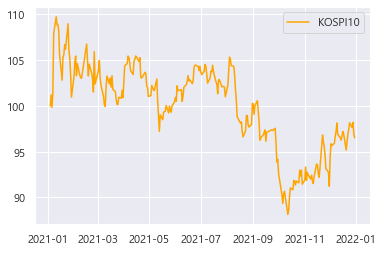

In [ ]:
plt.plot(k10_df['kospi10_index'], color='orange', label='KOSPI10')
plt.legend(loc=0)
plt.grid(True)

In [ ]:
k200_df = stock.get_index_ohlcv("20210101", "20211231", "1028")
k200_df.head()

코스피 200,시가,고가,저가,종가,거래량,거래대금
날짜,,,,,,
2021-01-04,389.50,400.78,388.88,399.88,361886757,20828370493095
2021-01-05,399.79,406.03,396.43,406.03,470868837,20755374346434
2021-01-06,406.33,411.21,401.06,402.08,429077337,22700275121526
2021-01-07,404.00,414.65,403.99,410.81,460331917,20865124437686
2021-01-08,412.06,431.99,412.06,430.22,499112018,34756755069426


In [ ]:
df=pd.concat([k10_df['kospi10_index'],k200_df['종가']],axis=1)
df.columns=['kospi10','kospi200']
df.head()

,kospi10,kospi200
날짜,,
2021-01-04,100.000000,399.88
2021-01-05,101.211904,406.03
2021-01-06,99.841115,402.08
2021-01-07,101.332219,410.81
2021-01-08,107.860529,430.22


In [ ]:
df['kospi10']=(df['kospi10']/100)*df['kospi200']['2021-01-04']
df.head()

,kospi10,kospi200
날짜,,
2021-01-04,399.880000,399.88
2021-01-05,404.726163,406.03
2021-01-06,399.244651,402.08
2021-01-07,405.207279,410.81
2021-01-08,431.312682,430.22


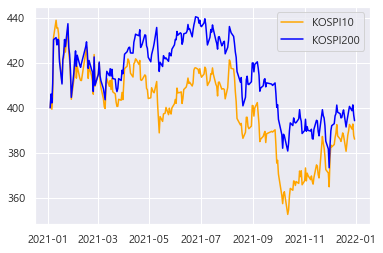

In [ ]:
plt.plot(df['kospi10'], color='orange', label='KOSPI10')
plt.plot(df['kospi200'], color='blue', label='KOSPI200')
plt.legend(loc=0)
plt.grid(True)

In [ ]:
k10_df

,삼성전자,SK하이닉스,LG화학,삼성전자우,삼성바이오로직스,현대차,NAVER,삼성SDI,셀트리온,카카오,kospi10,kospi10_index
날짜,,,,,,,,,,,,
2021-01-04,3.722631e+16,6.815413e+15,4.150093e+15,4.599667e+15,1.650460e+15,2.818892e+15,3.937448e+15,3.363217e+15,3.536676e+15,2.558975e+15,7.065715e+16,100.000000
2021-01-05,3.762997e+16,7.058820e+15,4.168767e+15,4.636761e+15,1.656433e+15,2.846062e+15,3.930729e+15,3.438401e+15,3.607918e+15,2.539589e+15,7.151345e+16,101.211904
2021-01-06,3.686750e+16,7.085865e+15,4.154762e+15,4.593484e+15,1.626569e+15,2.757760e+15,3.897133e+15,3.408328e+15,3.597741e+15,2.555744e+15,7.054489e+16,99.841115
2021-01-07,3.718146e+16,7.275182e+15,4.490877e+15,4.593484e+15,1.630551e+15,2.798515e+15,3.890413e+15,3.498548e+15,3.638451e+15,2.600979e+15,7.159846e+16,101.332219
2021-01-08,3.982767e+16,7.464499e+15,4.663603e+15,4.809867e+15,1.666387e+15,3.341916e+15,4.192777e+15,3.704050e+15,3.735137e+15,2.805274e+15,7.621118e+16,107.860529
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,3.610504e+16,6.923594e+15,2.898997e+15,4.500749e+15,1.761951e+15,2.927573e+15,5.153609e+15,3.262973e+15,2.090367e+15,3.729666e+15,6.935451e+16,98.156394
2021-12-27,3.597048e+16,6.815413e+15,2.927006e+15,4.476020e+15,1.763942e+15,2.900402e+15,5.106636e+15,3.227887e+15,2.121566e+15,3.680806e+15,6.899016e+16,97.640731
2021-12-28,3.601533e+16,6.896548e+15,2.950348e+15,4.476020e+15,1.773896e+15,2.907195e+15,5.160319e+15,3.262973e+15,2.246364e+15,3.697092e+15,6.938609e+16,98.201084


# 10일차 금융공학.

fund_df : fund 정보를 담고 있는 DataFrame

ks10_close : ks10 기업의 날짜별 종가를 가지고 있는 DataFrame

ks10_list : ks10 기업명 list

In [ ]:
fund_df = k10_df.copy()

In [ ]:
ks10_close = pd.DataFrame()
kospi10
for ks in kospi10:
    ks10_close[stock.get_market_ticker_name(ks)] = stock.get_market_ohlcv("20210101", "20211231", ks)['종가']
ks10_close.head()

,삼성전자,SK하이닉스,LG화학,삼성전자우,삼성바이오로직스,현대차,NAVER,삼성SDI,셀트리온,카카오
날짜,,,,,,,,,,
2021-01-04,83000,126000,889000,74400,819298,207500,293000,671000,341065,79483
2021-01-05,83900,130500,893000,75000,822263,209500,292500,686000,347935,78881
2021-01-06,82200,131000,890000,74300,807438,203000,290000,680000,346954,79383
2021-01-07,82900,134500,962000,74300,809415,206000,289500,698000,350880,80788
2021-01-08,88800,138000,999000,77800,827204,246000,312000,739000,360204,87111


In [ ]:
ks10_list = ['삼성전자', 'SK하이닉스', 'LG화학', '삼성전자우', '삼성바이오로직스', '현대차', 'NAVER', '삼성SDI','셀트리온', '카카오']

In [ ]:
for cp in ks10_list:
    fund_df[cp] = round(fund_df[cp]/fund_df['kospi10'],4) * 100
fund_df

,삼성전자,SK하이닉스,LG화학,삼성전자우,삼성바이오로직스,현대차,NAVER,삼성SDI,셀트리온,카카오,kospi10,kospi10_index
날짜,,,,,,,,,,,,
2021-01-04,52.69,9.65,5.87,6.51,2.34,3.99,5.57,4.76,5.01,3.62,7.065715e+16,100.000000
2021-01-05,52.62,9.87,5.83,6.48,2.32,3.98,5.50,4.81,5.05,3.55,7.151345e+16,101.211904
2021-01-06,52.26,10.04,5.89,6.51,2.31,3.91,5.52,4.83,5.10,3.62,7.054489e+16,99.841115
2021-01-07,51.93,10.16,6.27,6.42,2.28,3.91,5.43,4.89,5.08,3.63,7.159846e+16,101.332219
2021-01-08,52.26,9.79,6.12,6.31,2.19,4.39,5.50,4.86,4.90,3.68,7.621118e+16,107.860529
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,52.06,9.98,4.18,6.49,2.54,4.22,7.43,4.70,3.01,5.38,6.935451e+16,98.156394
2021-12-27,52.14,9.88,4.24,6.49,2.56,4.20,7.40,4.68,3.08,5.34,6.899016e+16,97.640731
2021-12-28,51.91,9.94,4.25,6.45,2.56,4.19,7.44,4.70,3.24,5.33,6.938609e+16,98.201084


* 좌수관련 설정.
    * Base > 총좌수(5000)
    * 설정좌수/환매좌수 > min : 100 / max : 3000

In [ ]:
fund_df['설정좌수'] = 0
fund_df['환매좌수'] = 0
fund_df['총좌수'] = 0

In [ ]:
import random
for gen_num in fund_df.index:
    fund_df['설정좌수'][gen_num] = np.random.randint(1,30) * 100
    fund_df['환매좌수'][gen_num] = np.random.randint(1,30) * 100
fund_df.head()

,삼성전자,SK하이닉스,LG화학,삼성전자우,삼성바이오로직스,현대차,NAVER,삼성SDI,셀트리온,카카오,kospi10,kospi10_index,설정좌수,환매좌수,총좌수
날짜,,,,,,,,,,,,,,,
2021-01-04,52.69,9.65,5.87,6.51,2.34,3.99,5.57,4.76,5.01,3.62,7.065715e+16,100.000000,2000,1500,0
2021-01-05,52.62,9.87,5.83,6.48,2.32,3.98,5.50,4.81,5.05,3.55,7.151345e+16,101.211904,2500,1600,0
2021-01-06,52.26,10.04,5.89,6.51,2.31,3.91,5.52,4.83,5.10,3.62,7.054489e+16,99.841115,2400,400,0
2021-01-07,51.93,10.16,6.27,6.42,2.28,3.91,5.43,4.89,5.08,3.63,7.159846e+16,101.332219,900,1100,0
2021-01-08,52.26,9.79,6.12,6.31,2.19,4.39,5.50,4.86,4.90,3.68,7.621118e+16,107.860529,400,2100,0


In [ ]:
fund_df['설정좌수'][0] = 5000
fund_df['환매좌수'][0] = 0
fund_df['총좌수'][0] = 5000
fund_df.head()

,삼성전자,SK하이닉스,LG화학,삼성전자우,삼성바이오로직스,현대차,NAVER,삼성SDI,셀트리온,카카오,kospi10,kospi10_index,설정좌수,환매좌수,총좌수
날짜,,,,,,,,,,,,,,,
2021-01-04,52.69,9.65,5.87,6.51,2.34,3.99,5.57,4.76,5.01,3.62,7.065715e+16,100.000000,5000,0,5000
2021-01-05,52.62,9.87,5.83,6.48,2.32,3.98,5.50,4.81,5.05,3.55,7.151345e+16,101.211904,2500,1600,0
2021-01-06,52.26,10.04,5.89,6.51,2.31,3.91,5.52,4.83,5.10,3.62,7.054489e+16,99.841115,2400,400,0
2021-01-07,51.93,10.16,6.27,6.42,2.28,3.91,5.43,4.89,5.08,3.63,7.159846e+16,101.332219,900,1100,0
2021-01-08,52.26,9.79,6.12,6.31,2.19,4.39,5.50,4.86,4.90,3.68,7.621118e+16,107.860529,400,2100,0


In [ ]:
for i in range(1,len(fund_df)):
    fund_df['총좌수'][i] = (fund_df['설정좌수'][i] -fund_df['환매좌수'][i]) + fund_df['총좌수'][i-1]

In [ ]:
fund_df['inav'] = 1000
fund_df['inav'] =  1000 * fund_df['kospi10_index']/fund_df['kospi10_index'][0]

In [ ]:
fund_df['inav'] = fund_df['inav'].astype(int)
fund_df.head()

,삼성전자,SK하이닉스,LG화학,삼성전자우,삼성바이오로직스,현대차,NAVER,삼성SDI,셀트리온,카카오,kospi10,kospi10_index,설정좌수,환매좌수,총좌수,inav
날짜,,,,,,,,,,,,,,,,
2021-01-04,52.69,9.65,5.87,6.51,2.34,3.99,5.57,4.76,5.01,3.62,7.065715e+16,100.000000,5000,0,5000,1000
2021-01-05,52.62,9.87,5.83,6.48,2.32,3.98,5.50,4.81,5.05,3.55,7.151345e+16,101.211904,2500,1600,5900,1012
2021-01-06,52.26,10.04,5.89,6.51,2.31,3.91,5.52,4.83,5.10,3.62,7.054489e+16,99.841115,2400,400,7900,998
2021-01-07,51.93,10.16,6.27,6.42,2.28,3.91,5.43,4.89,5.08,3.63,7.159846e+16,101.332219,900,1100,7700,1013
2021-01-08,52.26,9.79,6.12,6.31,2.19,4.39,5.50,4.86,4.90,3.68,7.621118e+16,107.860529,400,2100,6000,1078


In [ ]:
fund_df['AUM'] = fund_df['inav'] * fund_df['총좌수']
fund_df['AUM'] = fund_df['AUM'].astype(int)
fund_df.head()

,삼성전자,SK하이닉스,LG화학,삼성전자우,삼성바이오로직스,현대차,NAVER,삼성SDI,셀트리온,카카오,kospi10,kospi10_index,설정좌수,환매좌수,총좌수,inav,AUM
날짜,,,,,,,,,,,,,,,,,
2021-01-04,52.69,9.65,5.87,6.51,2.34,3.99,5.57,4.76,5.01,3.62,7.065715e+16,100.000000,5000,0,5000,1000,5000000
2021-01-05,52.62,9.87,5.83,6.48,2.32,3.98,5.50,4.81,5.05,3.55,7.151345e+16,101.211904,2500,1600,5900,1012,5970800
2021-01-06,52.26,10.04,5.89,6.51,2.31,3.91,5.52,4.83,5.10,3.62,7.054489e+16,99.841115,2400,400,7900,998,7884200
2021-01-07,51.93,10.16,6.27,6.42,2.28,3.91,5.43,4.89,5.08,3.63,7.159846e+16,101.332219,900,1100,7700,1013,7800100
2021-01-08,52.26,9.79,6.12,6.31,2.19,4.39,5.50,4.86,4.90,3.68,7.621118e+16,107.860529,400,2100,6000,1078,6468000


In [ ]:
fund_list = ['삼성전자', 'SK하이닉스', 'LG화학', '삼성전자우', '삼성바이오로직스', '현대차', 'NAVER', '삼성SDI','셀트리온', '카카오']
for company in fund_list:
    fund_df['일일매매_' + company] = 0
for company in fund_list:
    fund_df[company + '_잔고'] = 0
fund_df.head()

,삼성전자,SK하이닉스,LG화학,삼성전자우,삼성바이오로직스,현대차,NAVER,삼성SDI,셀트리온,카카오,kospi10,kospi10_index,설정좌수,환매좌수,총좌수,inav,AUM,일일매매_삼성전자,일일매매_SK하이닉스,일일매매_LG화학,일일매매_삼성전자우,일일매매_삼성바이오로직스,일일매매_현대차,일일매매_NAVER,일일매매_삼성SDI,일일매매_셀트리온,일일매매_카카오,삼성전자_잔고,SK하이닉스_잔고,LG화학_잔고,삼성전자우_잔고,삼성바이오로직스_잔고,현대차_잔고,NAVER_잔고,삼성SDI_잔고,셀트리온_잔고,카카오_잔고
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-04,52.69,9.65,5.87,6.51,2.34,3.99,5.57,4.76,5.01,3.62,7.065715e+16,100.000000,5000,0,5000,1000,5000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-01-05,52.62,9.87,5.83,6.48,2.32,3.98,5.50,4.81,5.05,3.55,7.151345e+16,101.211904,2500,1600,5900,1012,5970800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-01-06,52.26,10.04,5.89,6.51,2.31,3.91,5.52,4.83,5.10,3.62,7.054489e+16,99.841115,2400,400,7900,998,7884200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-01-07,51.93,10.16,6.27,6.42,2.28,3.91,5.43,4.89,5.08,3.63,7.159846e+16,101.332219,900,1100,7700,1013,7800100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2021-01-08,52.26,9.79,6.12,6.31,2.19,4.39,5.50,4.86,4.90,3.68,7.621118e+16,107.860529,400,2100,6000,1078,6468000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
for company in fund_list:
    today = '일일매매_'+ company
    tot_res = company+'_잔고'
    fund_df[today][0] = fund_df['AUM'][0] * fund_df[company][0]/ks10_close[company][0]
    fund_df[tot_res][0] = fund_df['AUM'][0] * fund_df[company][0]/ks10_close[company][0]

In [ ]:
for i in range(1,len(fund_df)):
    for company in fund_list:
        fund_df['일일매매_'+company][i] = (fund_df['AUM'][i] - fund_df['AUM'][i-1]) * fund_df[company][i] / ks10_close[company][i]
        fund_df[company+'_잔고'][i] = fund_df[company+'_잔고'][i-1] + fund_df['일일매매_'+company][i]

In [ ]:
fund_df.head()

,삼성전자,SK하이닉스,LG화학,삼성전자우,삼성바이오로직스,현대차,NAVER,삼성SDI,셀트리온,카카오,kospi10,kospi10_index,설정좌수,환매좌수,총좌수,inav,AUM,일일매매_삼성전자,일일매매_SK하이닉스,일일매매_LG화학,일일매매_삼성전자우,일일매매_삼성바이오로직스,일일매매_현대차,일일매매_NAVER,일일매매_삼성SDI,일일매매_셀트리온,일일매매_카카오,삼성전자_잔고,SK하이닉스_잔고,LG화학_잔고,삼성전자우_잔고,삼성바이오로직스_잔고,현대차_잔고,NAVER_잔고,삼성SDI_잔고,셀트리온_잔고,카카오_잔고
날짜,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-04,52.69,9.65,5.87,6.51,2.34,3.99,5.57,4.76,5.01,3.62,7.065715e+16,100.000000,5000,0,5000,1000,5000000,3174,382,33,437,14,96,95,35,73,227,3174,382,33,437,14,96,95,35,73,227
2021-01-05,52.62,9.87,5.83,6.48,2.32,3.98,5.50,4.81,5.05,3.55,7.151345e+16,101.211904,2500,1600,5900,1012,5970800,608,73,6,83,2,18,18,6,14,43,3782,455,39,520,16,114,113,41,87,270
2021-01-06,52.26,10.04,5.89,6.51,2.31,3.91,5.52,4.83,5.10,3.62,7.054489e+16,99.841115,2400,400,7900,998,7884200,1216,146,12,167,5,36,36,13,28,87,4998,601,51,687,21,150,149,54,115,357
2021-01-07,51.93,10.16,6.27,6.42,2.28,3.91,5.43,4.89,5.08,3.63,7.159846e+16,101.332219,900,1100,7700,1013,7800100,-52,-6,0,-7,0,-1,-1,0,-1,-3,4946,595,51,680,21,149,148,54,114,354
2021-01-08,52.26,9.79,6.12,6.31,2.19,4.39,5.50,4.86,4.90,3.68,7.621118e+16,107.860529,400,2100,6000,1078,6468000,-783,-94,-8,-108,-3,-23,-23,-8,-18,-56,4163,501,43,572,18,126,125,46,96,298


* 당일 주식시장이 끝나 > 해당기업종가갱신 > 설정좌수 환매좌수 파악 > 총좌수 갱신 > AUM 갱신 > 당일주식 매매/도 > 주식잔고 갱신